In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as st
import math
import datetime
from scipy.stats import norm, skew
from sklearn import metrics
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn import model_selection
from sklearn.pipeline import make_pipeline



# from termcolor import colored
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

#to see model hyperparameters
from sklearn import set_config
set_config(print_changed_only = False)

# to show all columns
pd.set_option('display.max_columns', 15)

In [140]:
car = pd.read_csv("car_dataset.csv")
df = car.copy()
df.head().style.background_gradient(cmap = "autumn")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [142]:
categoric_columns = ["fuel", "transmission", "owner", "seller_type"]
for column in categoric_columns:
    df[column] = df[column].astype("category")

In [143]:
#create 'car_brand_name' feature from 'name' feature

df["car_brand_name"] = df["name"].str.extract('([^\s]+)')
df["car_brand_name"] = df["car_brand_name"].astype("category")

In [144]:
#extract values of 'engine' and 'mileage' variables

df["engine"] = df["engine"].str.extract('([^\s]+)').astype("float")
df["mileage"] = df["mileage"].str.extract('([^\s]+)').astype("float")

In [145]:
#extract values of 'max_power' variable

df["max_power"] = df["max_power"].str.extract('([^\s]+)')
df["max_power"] = df["max_power"][~(df["max_power"] == "bhp")]
df["max_power"] = df["max_power"].astype("float")

In [146]:
#create 'car_age' feature from 'year' column

df["car_age"] = (datetime.datetime.now().year) - (df["year"])

In [147]:
df.drop(["name", "year", "torque"], axis = 1, inplace = True)

In [148]:
df.head().style.background_gradient(cmap = "summer")

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.000000,74.000000,5.000000,Maruti,10
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.140000,1498.000000,103.520000,5.000000,Skoda,10
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.700000,1497.000000,78.000000,5.000000,Honda,18
3,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.000000,90.000000,5.000000,Hyundai,14
4,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.000000,88.200000,5.000000,Maruti,17


In [149]:
# check whether there are null values in the dataset
df.isnull().sum()

selling_price       0
km_driven           0
fuel                0
seller_type         0
transmission        0
owner               0
mileage           221
engine            221
max_power         216
seats             221
car_brand_name      0
car_age             0
dtype: int64

In [150]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
selling_price,8128.000000,638271.807702,806253.403508,29999.000000,254999.000000,450000.000000,675000.000000,10000000.000000
km_driven,8128.000000,69819.510827,56550.554958,1.000000,35000.000000,60000.000000,98000.000000,2360457.000000
mileage,7907.000000,19.418783,4.037145,0.000000,16.780000,19.300000,22.320000,42.000000
engine,7907.000000,1458.625016,503.916303,624.000000,1197.000000,1248.000000,1582.000000,3604.000000
max_power,7912.000000,91.517919,35.822499,0.000000,68.050000,82.000000,102.000000,400.000000
seats,7907.000000,5.416719,0.959588,2.000000,5.000000,5.000000,5.000000,14.000000
car_age,8128.000000,10.195989,4.044249,4.000000,7.000000,9.000000,13.000000,41.000000


In [151]:
df.describe(include = "category").T

,count,unique,top,freq
fuel,8128,4,Diesel,4402
seller_type,8128,3,Individual,6766
transmission,8128,2,Manual,7078
owner,8128,5,First Owner,5289
car_brand_name,8128,32,Maruti,2448


In [152]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,10
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,10
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,18
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,14
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,17


In [153]:
#fill null values with median (numeric) and frequent values (categoric)

numeric_data = [column for column in df.select_dtypes(["int", "float"])]
categoric_data = [column for column in df.select_dtypes(exclude = ["int", "float"])]

for col in numeric_data:
    df[col].fillna(df[col].median(), inplace = True)

#replace missing values in each categorical column with the most frequent value
for col in categoric_data:
    df[col].fillna(df[col].value_counts().index[0], inplace = True)

In [154]:
#check null values again

df.isnull().sum().sum()

0

In [155]:
#get class frequencies of some variables

print("Class frequencies of 'transmission' variable: \n\n", df["transmission"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'seller_type' variable: \n\n", df["seller_type"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'owner' variable: \n\n", df["owner"].value_counts())

print("_____________________________________________________________________________________")

print("Class frequencies of 'car_brand_name' variable: \n\n", df["car_brand_name"].value_counts())

Class frequencies of 'transmission' variable: 

 Manual       7078
Automatic    1050
Name: transmission, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'seller_type' variable: 

 Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: seller_type, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'owner' variable: 

 First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: owner, dtype: int64
_____________________________________________________________________________________
Class frequencies of 'car_brand_name' variable: 

 Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswa

In [156]:
# #check correlation between the variables of dataset

# df.corr().style.background_gradient(cmap = "copper")

In [157]:
print("Basic descriptive statistics of the target variable - 'selling_price': \n\n",
      df["selling_price"].describe())

Basic descriptive statistics of the target variable - 'selling_price': 

 count    8.128000e+03
mean     6.382718e+05
std      8.062534e+05
min      2.999900e+04
25%      2.549990e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.000000e+07
Name: selling_price, dtype: float64


In [158]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,10
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,10
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,18
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,14
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,17


In [159]:
print("Skewness of target variable: ", df["selling_price"].skew())
print("Kurtosis of target variable: ", df["selling_price"].kurt())

Skewness of target variable:  4.193533440675855
Kurtosis of target variable:  21.081289012186755


In [160]:
df["selling_price"] = np.log1p(df["selling_price"])
df["selling_price"].head(n = 10)

0    13.017005
1    12.821261
2    11.970357
3    12.323860
4    11.775297
5    12.994532
6    11.472114
7    10.714440
8    12.765691
9    12.206078
Name: selling_price, dtype: float64

In [161]:
# get skewness of other numeric variables

numeric_data = [column for column in df.select_dtypes(["int", "float"])]
for col in numeric_data:
    print("Skewness of", col, "variable is:", df[col].skew())


Skewness of selling_price variable is: 0.22327004522860716
Skewness of km_driven variable is: 11.170909783549087
Skewness of mileage variable is: -0.14220847114521287
Skewness of engine variable is: 1.1753055440141613
Skewness of max_power variable is: 1.6595575154307947
Skewness of seats variable is: 2.015507247545297
Skewness of car_age variable is: 1.072292893616034


In [162]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,13.017005,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,10
1,12.821261,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,10
2,11.970357,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,18
3,12.323860,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,14
4,11.775297,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,17


In [163]:
# fix skewness  of them with 'log1p' function

for c in numeric_data:
    df[c] = np.log1p(df[c])

In [164]:
# select dependent variable (label)
x = df.drop("selling_price", axis = 1)
y = df["selling_price"]

In [165]:
x = df.drop("selling_price", axis = 1)

In [166]:
x

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,11.887938,Diesel,Individual,Manual,First Owner,3.194583,7.130099,4.317488,1.791759,Maruti,2.397895
1,11.695255,Diesel,Individual,Manual,Second Owner,3.097386,7.312553,4.649378,1.791759,Skoda,2.397895
2,11.849405,Petrol,Individual,Manual,Third Owner,2.928524,7.311886,4.369448,1.791759,Honda,2.944439
3,11.751950,Diesel,Individual,Manual,First Owner,3.178054,7.242082,4.510860,1.791759,Hyundai,2.708050
4,11.695255,Petrol,Individual,Manual,First Owner,2.839078,7.169350,4.490881,1.791759,Maruti,2.890372
...,...,...,...,...,...,...,...,...,...,...,...
8123,11.608245,Petrol,Individual,Manual,First Owner,2.970414,7.088409,4.429029,1.791759,Hyundai,2.484907
8124,11.686887,Diesel,Individual,Manual,Fourth & Above Owner,2.879198,7.309212,4.709530,1.791759,Hyundai,2.890372
8125,11.695255,Diesel,Individual,Manual,First Owner,3.010621,7.130099,4.316154,1.791759,Maruti,2.772589
8126,10.126671,Diesel,Individual,Manual,First Owner,3.201526,7.242082,4.262680,1.791759,Tata,2.484907


In [167]:
from sklearn.preprocessing import LabelEncoder

# Define columns with categorical variables
categorical_cols = ['fuel', 'seller_type', 'transmission', 'owner', 'car_brand_name']

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    x[col] = label_encoders[col].fit_transform(x[col])

In [168]:
df_label=x

In [169]:
x

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_brand_name,car_age
0,11.887938,1,1,1,0,3.194583,7.130099,4.317488,1.791759,20,2.397895
1,11.695255,1,1,1,2,3.097386,7.312553,4.649378,1.791759,27,2.397895
2,11.849405,3,1,1,4,2.928524,7.311886,4.369448,1.791759,10,2.944439
3,11.751950,1,1,1,0,3.178054,7.242082,4.510860,1.791759,11,2.708050
4,11.695255,3,1,1,0,2.839078,7.169350,4.490881,1.791759,20,2.890372
...,...,...,...,...,...,...,...,...,...,...,...
8123,11.608245,3,1,1,0,2.970414,7.088409,4.429029,1.791759,11,2.484907
8124,11.686887,1,1,1,1,2.879198,7.309212,4.709530,1.791759,11,2.890372
8125,11.695255,1,1,1,0,3.010621,7.130099,4.316154,1.791759,20,2.772589
8126,10.126671,1,1,1,0,3.201526,7.242082,4.262680,1.791759,28,2.484907


In [170]:
y.shape, x.shape

((8128,), (8128, 11))

In [171]:
# Split the dataset into x_train (y_train) and x_test (y_test) sets

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)
print(x_train.shape)
print(x_test.shape)


(6502, 11)
(1626, 11)


In [172]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import numpy as np

## SVR

In [173]:
# Define number of folds for cross-validation
n_folds = 4
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

In [174]:

# Initialize SVR models for each fold
svr_models = []

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
medae_scores = []


In [175]:
# Perform k-fold cross-validation
for train_index, test_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Initialize SVR model for this fold with more complex hyperparameters
    svr = SVR()

    # Fit SVR model to the training fold
    svr.fit(x_train_fold, y_train_fold)

    # Store trained model for this fold
    svr_models.append(svr)

    # Predict on the validation fold
    y_pred_fold = svr.predict(x_val_fold)

        # Calculate evaluation metrics for the fold
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, y_pred_fold)
    # medae_fold = median_absolute_error(y_val_fold, y_pred_fold)

        # Store evaluation metrics for this fold
    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    # medae_scores.append(medae_fold)

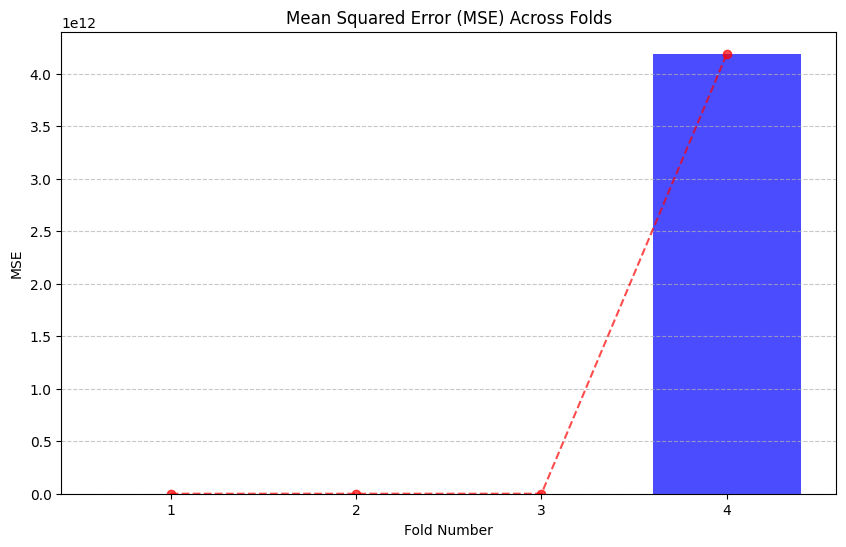

In [203]:
import matplotlib.pyplot as plt

# Number of folds
num_folds = len(mse_scores)

# Generate x-axis values (fold numbers)
fold_numbers = list(range(1, num_folds + 1))

# Plot MSE scores as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(fold_numbers, mse_scores, color='b', alpha=0.7)
plt.title('Mean Squared Error (MSE) Across Folds')
plt.xlabel('Fold Number')
plt.ylabel('MSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fold_numbers)

# Overlay a dotted line plot for MSE scores
plt.plot(fold_numbers, mse_scores, marker='o', linestyle='--', color='r', alpha=0.7)

plt.show()


In [177]:
# Print evaluation metrics for each fold
for i in range(n_folds):
    print(f"Fold {i+1} - Mean Squared Error (MSE): {mse_scores[i]}, "
          f"Root Mean Squared Error (RMSE): {rmse_scores[i]}, "
          f"Mean Absolute Error (MAE): {mae_scores[i]}, "
          )


Fold 1 - Mean Squared Error (MSE): 0.001849551188007335, Root Mean Squared Error (RMSE): 0.043006408685303345, Mean Absolute Error (MAE): 0.03656424003974705, 
Fold 2 - Mean Squared Error (MSE): 0.0018444820949070752, Root Mean Squared Error (RMSE): 0.04294743408990897, Mean Absolute Error (MAE): 0.036483309382214966, 
Fold 3 - Mean Squared Error (MSE): 0.0017880856006954986, Root Mean Squared Error (RMSE): 0.04228576120510897, Mean Absolute Error (MAE): 0.03534083398907178, 
Fold 4 - Mean Squared Error (MSE): 0.001774777390948541, Root Mean Squared Error (RMSE): 0.042128106899652414, Mean Absolute Error (MAE): 0.03562445990599254, 
Fold 5 - Mean Squared Error (MSE): 0.0019945233412002683, Root Mean Squared Error (RMSE): 0.04466008666807834, Mean Absolute Error (MAE): 0.038021982424992946, 


In [178]:
# Calculate mean evaluation metrics for each fold
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)


# Print mean evaluation metrics
print(f"Mean Squared Error (MSE): {avg_mse}")
print(f"Root Mean Squared Error (RMSE): {avg_rmse}")
print(f"Mean Absolute Error (MAE): {avg_mae}")



Mean Squared Error (MSE): 0.0018502839231517437
Root Mean Squared Error (RMSE): 0.0430055595096104
Mean Absolute Error (MAE): 0.03640696514840386


In [179]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Fit the SVR model on the entire training data
svr.fit(x_train, y_train)

# Predict on the test data
y_test_pred = svr.predict(x_test)

# Calculate evaluation metrics for the test data
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)


print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test MAE:", mae_test)



Test MSE: 0.0017212984574328117
Test RMSE: 0.04148853404776809
Test MAE: 0.035281177043170936


In [180]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission', 'owner', 'car_brand_name'])

print(df_encoded)

      selling_price  km_driven   mileage    engine  max_power     seats  \
0          2.640271  11.887938  3.194583  7.130099   4.317488  1.791759   
1          2.626208  11.695255  3.097386  7.312553   4.649378  1.791759   
2          2.562666  11.849405  2.928524  7.311886   4.369448  1.791759   
3          2.589556  11.751950  3.178054  7.242082   4.510860  1.791759   
4          2.547513  11.695255  2.839078  7.169350   4.490881  1.791759   
...             ...        ...       ...       ...        ...       ...   
8123       2.615648  11.608245  2.970414  7.088409   4.429029  1.791759   
8124       2.550463  11.686887  2.879198  7.309212   4.709530  1.791759   
8125       2.628515  11.695255  3.010621  7.130099   4.316154  1.791759   
8126       2.608424  10.126671  3.201526  7.242082   4.262680  1.791759   
8127       2.608424  10.126671  3.201526  7.242082   4.262680  1.791759   

       car_age  ...  car_brand_name_Peugeot  car_brand_name_Renault  \
0     2.397895  ...         

In [181]:
df_encoded.head()

,selling_price,km_driven,mileage,engine,max_power,seats,car_age,...,car_brand_name_Peugeot,car_brand_name_Renault,car_brand_name_Skoda,car_brand_name_Tata,car_brand_name_Toyota,car_brand_name_Volkswagen,car_brand_name_Volvo
0,2.640271,11.887938,3.194583,7.130099,4.317488,1.791759,2.397895,...,0,0,0,0,0,0,0
1,2.626208,11.695255,3.097386,7.312553,4.649378,1.791759,2.397895,...,0,0,1,0,0,0,0
2,2.562666,11.849405,2.928524,7.311886,4.369448,1.791759,2.944439,...,0,0,0,0,0,0,0
3,2.589556,11.751950,3.178054,7.242082,4.510860,1.791759,2.708050,...,0,0,0,0,0,0,0
4,2.547513,11.695255,2.839078,7.169350,4.490881,1.791759,2.890372,...,0,0,0,0,0,0,0


In [182]:
df_encoded.shape

(8128, 53)

In [183]:
y1 = df_encoded["selling_price"]

In [184]:
x1 = df_encoded.drop("selling_price", axis = 1)


In [185]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)
print(x_train.shape)
print(x_test.shape)

(6502, 52)
(1626, 52)


In [186]:
# Define number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)



In [187]:
# Initialize SVR models for each fold
svr_models = []

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []




In [188]:
# Perform k-fold cross-validation
for train_index, test_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Initialize SVR model for this fold with more complex hyperparameters
    svr = SVR()

    # Fit SVR model to the training fold
    svr.fit(x_train_fold, y_train_fold)

    # Store trained model for this fold
    svr_models.append(svr)

    # Predict on the validation fold
    y_pred_fold = svr.predict(x_val_fold)

        # Calculate evaluation metrics for the fold
    mse_fold = mean_squared_error(y_val_fold, y_pred_fold)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_val_fold, y_pred_fold)

    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)


In [189]:
# Print evaluation metrics for each fold
for i in range(n_folds):
    print(f"Fold {i+1} - Mean Squared Error (MSE): {mse_scores[i]}, "
          f"Root Mean Squared Error (RMSE): {rmse_scores[i]}, "
          f"Mean Absolute Error (MAE): {mae_scores[i]}, "
          )

Fold 1 - Mean Squared Error (MSE): 0.0017890074371183459, Root Mean Squared Error (RMSE): 0.04229665988134697, Mean Absolute Error (MAE): 0.03634545933660066, 
Fold 2 - Mean Squared Error (MSE): 0.001951987905850877, Root Mean Squared Error (RMSE): 0.04418130719943534, Mean Absolute Error (MAE): 0.03822419143769807, 
Fold 3 - Mean Squared Error (MSE): 0.0018526068401861749, Root Mean Squared Error (RMSE): 0.04304191956902218, Mean Absolute Error (MAE): 0.036498360045407026, 
Fold 4 - Mean Squared Error (MSE): 0.0016938180864466655, Root Mean Squared Error (RMSE): 0.041156021265990536, Mean Absolute Error (MAE): 0.035158179831449796, 
Fold 5 - Mean Squared Error (MSE): 0.0021169154994977583, Root Mean Squared Error (RMSE): 0.04600995000538208, Mean Absolute Error (MAE): 0.039751280068581925, 


In [190]:
# Calculate mean evaluation metrics for each fold
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)


# Print mean evaluation metrics
print(f"Mean Squared Error (MSE): {avg_mse}")
print(f"Root Mean Squared Error (RMSE): {avg_rmse}")
print(f"Mean Absolute Error (MAE): {avg_mae}")

Mean Squared Error (MSE): 0.0018808671538199644
Root Mean Squared Error (RMSE): 0.04333717158423542
Mean Absolute Error (MAE): 0.037195494143947495


In [191]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
import numpy as np

# Define the percentage of variance to preserve
variance_to_preserve = 0.6

# Instantiate PCA with the desired variance to preserve
pca = PCA(n_components=variance_to_preserve)

# Fit PCA on the features
x = df_encoded.drop("selling_price", axis=1)
pca.fit(x)

# Transform the encoded DataFrame
x_pca = pca.transform(x)

# Define the number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

# Initialize SVR models for each fold
svr_models = []

# Initialize lists to store evaluation metrics and losses for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
train_losses = []
test_losses = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x_pca):
    x_train_fold, x_test_fold = x_pca[train_index], x_pca[test_index]
    y_train_fold, y_test_fold = y1.iloc[train_index], y1.iloc[test_index]

    # Initialize SVR model for this fold
    svr = SVR()

    # Fit SVR model to the training fold with reduced dimensionality
    svr.fit(x_train_fold, y_train_fold)

    # Store trained model for this fold
    svr_models.append(svr)

    # Predict on the training fold
    y_train_pred = svr.predict(x_train_fold)
    # Predict on the test fold
    y_test_pred = svr.predict(x_test_fold)

    # Calculate evaluation metrics for the fold
    mse_fold = mean_squared_error(y_test_fold, y_test_pred)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_test_fold, y_test_pred)

    # Calculate training loss
    train_loss = mean_squared_error(y_train_fold, y_train_pred)
    # Calculate test loss
    test_loss = mean_squared_error(y_test_fold, y_test_pred)

    # Append evaluation metrics and losses to lists
    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Print evaluation metrics and losses for each fold
for i in range(n_folds):
    print(f"Fold {i+1} - Mean Squared Error (MSE): {mse_scores[i]}, "
          f"Root Mean Squared Error (RMSE): {rmse_scores[i]}, "
          f"Mean Absolute Error (MAE): {mae_scores[i]}, "
          f"Train Loss: {train_losses[i]}, Test Loss: {test_losses[i]}")

# Calculate mean evaluation metrics and losses across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)
avg_train_loss = np.mean(train_losses)
avg_test_loss = np.mean(test_losses)

# Print mean evaluation metrics and losses
print(f"\nMean Squared Error (MSE) across all folds: {avg_mse}")
print(f"Root Mean Squared Error (RMSE) across all folds: {avg_rmse}")
print(f"Mean Absolute Error (MAE) across all folds: {avg_mae}")
print(f"Mean Train Loss across all folds: {avg_train_loss}")
print(f"Mean Test Loss across all folds: {avg_test_loss}")


Fold 1 - Mean Squared Error (MSE): 0.002138664061706301, Root Mean Squared Error (RMSE): 0.04624569235838405, Mean Absolute Error (MAE): 0.0393159826378351, Train Loss: 0.002120859341748954, Test Loss: 0.002138664061706301
Fold 2 - Mean Squared Error (MSE): 0.0021462095873394553, Root Mean Squared Error (RMSE): 0.04632720137607554, Mean Absolute Error (MAE): 0.039239180787368905, Train Loss: 0.002132894166879463, Test Loss: 0.0021462095873394553
Fold 3 - Mean Squared Error (MSE): 0.0020843543503927457, Root Mean Squared Error (RMSE): 0.045654729770230225, Mean Absolute Error (MAE): 0.03870894853837587, Train Loss: 0.002107837377760701, Test Loss: 0.0020843543503927457
Fold 4 - Mean Squared Error (MSE): 0.0023534261310061877, Root Mean Squared Error (RMSE): 0.04851212354665777, Mean Absolute Error (MAE): 0.0409790953222359, Train Loss: 0.0022210566571284067, Test Loss: 0.0023534261310061877
Fold 5 - Mean Squared Error (MSE): 0.002123631922011191, Root Mean Squared Error (RMSE): 0.046082

In [192]:
df_encoded.shape

(8128, 53)

In [193]:
df_label.shape

(8128, 11)

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

# Define the percentage of variance to preserve
variance_to_preserve = 0.5

# Initialize PCA
pca = PCA(n_components=variance_to_preserve)

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(df_encoded):
    train_data, test_data = df_encoded.iloc[train_index], df_encoded.iloc[test_index]
    x_train_fold, x_test_fold = train_data.drop("selling_price", axis=1), test_data.drop("selling_price", axis=1)
    y_train_fold, y_test_fold = train_data["selling_price"], test_data["selling_price"]

    # Fit PCA on the training data
    pca.fit(x_train_fold)

    # Transform the training and testing data
    x_train_fold_pca = pca.transform(x_train_fold)
    x_test_fold_pca = pca.transform(x_test_fold)

    # Initialize Linear Regression model
    lr = LinearRegression()

    # Train the model
    lr.fit(x_train_fold_pca, y_train_fold)

    # Make predictions on the test set
    y_pred_fold = lr.predict(x_test_fold_pca)

    # Calculate evaluation metrics for the fold
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_test_fold, y_pred_fold)

    # Append evaluation metrics to lists
    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)

# Print evaluation metrics for each fold
for i in range(n_folds):
    print(f"Fold {i+1} - Mean Squared Error (MSE): {mse_scores[i]}, "
          f"Root Mean Squared Error (RMSE): {rmse_scores[i]}, "
          f"Mean Absolute Error (MAE): {mae_scores[i]}")

# Calculate mean evaluation metrics across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)

# Print mean evaluation metrics
print(f"\nMean Squared Error (MSE) across all folds: {avg_mse}")
print(f"Root Mean Squared Error (RMSE) across all folds: {avg_rmse}")
print(f"Mean Absolute Error (MAE) across all folds: {avg_mae}")


Fold 1 - Mean Squared Error (MSE): 0.0013194053371692013, Root Mean Squared Error (RMSE): 0.03632361954939515, Mean Absolute Error (MAE): 0.02794375685416744
Fold 2 - Mean Squared Error (MSE): 0.0012657425189769793, Root Mean Squared Error (RMSE): 0.03557727531693482, Mean Absolute Error (MAE): 0.02753234881450434
Fold 3 - Mean Squared Error (MSE): 0.0012831498497686664, Root Mean Squared Error (RMSE): 0.03582108108040105, Mean Absolute Error (MAE): 0.027705945324328237
Fold 4 - Mean Squared Error (MSE): 0.0013862834670116417, Root Mean Squared Error (RMSE): 0.037232827813794125, Mean Absolute Error (MAE): 0.028814928152844897
Fold 5 - Mean Squared Error (MSE): 0.0013230636163319431, Root Mean Squared Error (RMSE): 0.036373941446204906, Mean Absolute Error (MAE): 0.02801494422597209

Mean Squared Error (MSE) across all folds: 0.0013155289578516863
Root Mean Squared Error (RMSE) across all folds: 0.03626574904134601
Mean Absolute Error (MAE) across all folds: 0.0280023846743634


In [196]:
# Split the dataset into x_train (y_train) and x_test (y_test) sets

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)
print(x_train.shape)
print(x_test.shape)


(6502, 52)
(1626, 52)


In [197]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define the number of folds for cross-validation
n_folds = 4
kf = KFold(n_splits=n_folds, shuffle=True, random_state=1)

# Initialize lists to store evaluation metrics for each fold
mse_scores = []
rmse_scores = []
mae_scores = []
train_losses = []
test_losses = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Initialize Linear Regression model
    lr = LinearRegression()

    # Train the model
    lr.fit(x_train_fold, y_train_fold)

    # Make predictions on the train set
    y_train_pred = lr.predict(x_train_fold)
    # Make predictions on the test set
    y_test_pred = lr.predict(x_test_fold)

    # Calculate evaluation metrics for the train and test sets
    train_loss = mean_squared_error(y_train_fold, y_train_pred)
    test_loss = mean_squared_error(y_test_fold, y_test_pred)

    # Calculate evaluation metrics for the fold
    mse_fold = mean_squared_error(y_test_fold, y_test_pred)
    rmse_fold = np.sqrt(mse_fold)
    mae_fold = mean_absolute_error(y_test_fold, y_test_pred)

    # Append evaluation metrics to lists
    mse_scores.append(mse_fold)
    rmse_scores.append(rmse_fold)
    mae_scores.append(mae_fold)
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Print evaluation metrics for each fold
for i in range(n_folds):
    print(f"Fold {i+1} - Mean Squared Error (MSE): {mse_scores[i]}, "
          f"Root Mean Squared Error (RMSE): {rmse_scores[i]}, "
          f"Mean Absolute Error (MAE): {mae_scores[i]}, "
          f"Train Loss: {train_losses[i]}, Test Loss: {test_losses[i]}")

# Calculate mean evaluation metrics across all folds
avg_mse = np.mean(mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_mae = np.mean(mae_scores)
avg_train_loss = np.mean(train_losses)
avg_test_loss = np.mean(test_losses)

# Print mean evaluation metrics
print(f"\nMean Squared Error (MSE) across all folds: {avg_mse}")
print(f"Root Mean Squared Error (RMSE) across all folds: {avg_rmse}")
print(f"Mean Absolute Error (MAE) across all folds: {avg_mae}")
print(f"Mean Train Loss across all folds: {avg_train_loss}")
print(f"Mean Test Loss across all folds: {avg_test_loss}")


Fold 1 - Mean Squared Error (MSE): 0.0004017275883404784, Root Mean Squared Error (RMSE): 0.020043143175172858, Mean Absolute Error (MAE): 0.014825559628893358, Train Loss: 0.0003858269033206242, Test Loss: 0.0004017275883404784
Fold 2 - Mean Squared Error (MSE): 0.00036076549048006117, Root Mean Squared Error (RMSE): 0.018993827694281665, Mean Absolute Error (MAE): 0.014202527579825834, Train Loss: 0.0003995194737828721, Test Loss: 0.00036076549048006117
Fold 3 - Mean Squared Error (MSE): 0.0004574701327095077, Root Mean Squared Error (RMSE): 0.021388551440186587, Mean Absolute Error (MAE): 0.014813318881292623, Train Loss: 0.00037187815377831383, Test Loss: 0.0004574701327095077
Fold 4 - Mean Squared Error (MSE): 4189358059422.4517, Root Mean Squared Error (RMSE): 2046792.1387924207, Mean Absolute Error (MAE): 77890.04397542335, Train Loss: 0.00039097515208202265, Test Loss: 4189358059422.4517

Mean Squared Error (MSE) across all folds: 1047339514855.6132
Root Mean Squared Error (RMS

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

# Scale the input features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Split the scaled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, shuffle=True, random_state=1)

# Define and train the autoencoder model
autoencoder = MLPRegressor(hidden_layer_sizes=(256, 128, 256), activation='relu', solver='adam', random_state=1)
autoencoder.fit(x_train, x_train)

# Encode the input data using the trained autoencoder
x_train_encoded = autoencoder.predict(x_train)
x_test_encoded = autoencoder.predict(x_test)

# Print the shapes of the encoded data
print("Shape of encoded training data:", x_train_encoded.shape)
print("Shape of encoded testing data:", x_test_encoded.shape)


Shape of encoded training data: (6502, 52)
Shape of encoded testing data: (1626, 52)


In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

# Scale the input features
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Split the scaled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, shuffle=True, random_state=1)

# Define and train the autoencoder model
autoencoder = MLPRegressor(hidden_layer_sizes=(256, 128, 256), activation='relu', solver='adam', random_state=1)
autoencoder.fit(x_train, x_train)

# Encode the input data using the trained autoencoder
x_train_encoded = autoencoder.predict(x_train)
x_test_encoded = autoencoder.predict(x_test)

# Print the shapes of the encoded data
print("Shape of encoded training data:", x_train_encoded.shape)
print("Shape of encoded testing data:", x_test_encoded.shape)


Shape of encoded training data: (6502, 52)
Shape of encoded testing data: (1626, 52)


In [200]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np


class MINTModel(BaseEstimator):
    def __init__(self, noise_level=0.1, svr_params=None):
        self.noise_level = noise_level
        self.scaler = StandardScaler()
        self.svr_params = svr_params if svr_params else {'kernel': 'rbf'}
        self.svr = SVR(**self.svr_params)
        self.training_losses = {'MSE': [], 'RMSE': [], 'MAE': []}
        self.testing_losses = {'MSE': [], 'RMSE': [], 'MAE': []}

    def fit(self, X_train, y_train, X_test, y_test):
        # Scale data
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Fit SVR
        self.svr.fit(X_train_scaled, y_train)

        # Predict
        y_train_pred = self.svr.predict(X_train_scaled)
        y_test_pred = self.svr.predict(X_test_scaled)

        # Compute losses
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)

        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        self.training_losses['MSE'].append(train_mse)
        self.training_losses['RMSE'].append(train_rmse)
        self.training_losses['MAE'].append(train_mae)

        self.testing_losses['MSE'].append(test_mse)
        self.testing_losses['RMSE'].append(test_rmse)
        self.testing_losses['MAE'].append(test_mae)

        return self

# Instantiate the model
model = MINTModel(noise_level=0.1, svr_params={'kernel': 'rbf'})

# Split the data into training and testing sets
# Replace X_train, y_train, X_test, y_test with your actual data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, X_test, y_test)

# Print training and testing losses for each metric
print("Training Losses:")
for metric, losses in model.training_losses.items():
    print(f"{metric}: {losses}")

print("\nTesting Losses:")
for metric, losses in model.testing_losses.items():
    print(f"{metric}: {losses}")


Training Losses:
MSE: [0.002524892910051497]
RMSE: [0.05024831250949127]
MAE: [0.0436747594111284]

Testing Losses:
MSE: [0.0024505192320830173]
RMSE: [0.04950271944128946]
MAE: [0.0430264100488786]


## Final Proposed Model

In [201]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np


class LinDenoise (BaseEstimator):
    def __init__(self, noise_level=0.1, lr_params=None):
        self.noise_level = noise_level
        self.scaler = StandardScaler()
        self.lr_params = lr_params if lr_params else {}
        self.lr = LinearRegression(**self.lr_params)
        self.training_losses = {'MSE': [], 'RMSE': [], 'MAE': []}
        self.testing_losses = {'MSE': [], 'RMSE': [], 'MAE': []}

    def fit(self, X_train, y_train, X_test, y_test):
        # Scale data
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Fit Linear Regression
        self.lr.fit(X_train_scaled, y_train)

        # Predict with Linear Regression
        y_train_pred = self.lr.predict(X_train_scaled)
        y_test_pred = self.lr.predict(X_test_scaled)

        # Compute losses
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)

        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        # Store losses
        self.training_losses['MSE'].append(train_mse)
        self.training_losses['RMSE'].append(train_rmse)
        self.training_losses['MAE'].append(train_mae)

        self.testing_losses['MSE'].append(test_mse)
        self.testing_losses['RMSE'].append(test_rmse)
        self.testing_losses['MAE'].append(test_mae)

        return self

# Instantiate the model
model = LinDenoise (noise_level=0.1, lr_params={})

# Split the data into training and testing sets
# Replace X_train, y_train, X_test, y_test with your actual data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, X_test, y_test)

# Print training and testing losses for each metric
print("Training Losses:")
for metric, losses in model.training_losses.items():
    print(f"{metric}: {losses}")

print("\nTesting Losses:")
for metric, losses in model.testing_losses.items():
    print(f"{metric}: {losses}")


Training Losses:
MSE: [0.00038739299113645293]
RMSE: [0.019682301469504344]
MAE: [0.014464202707448809]

Testing Losses:
MSE: [0.0003990136220666728]
RMSE: [0.019975325330684173]
MAE: [0.014742284267214767]


In [202]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Define MINT model with Linear Regression
class LinDenoise (BaseEstimator):
    def __init__(self, noise_level=0.1, lr_params=None):
        self.noise_level = noise_level
        self.scaler = StandardScaler()
        self.lr_params = lr_params if lr_params else {}
        self.lr = LinearRegression(**self.lr_params)
        self.training_losses = {'MSE': [], 'RMSE': [], 'MAE': []}
        self.testing_losses = {'MSE': [], 'RMSE': [], 'MAE': []}

    def fit(self, X_train, y_train, X_test, y_test):
        # Scale data
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Fit Linear Regression
        self.lr.fit(X_train_scaled, y_train)

        # Predict with Linear Regression
        y_train_pred = self.lr.predict(X_train_scaled)
        y_test_pred = self.lr.predict(X_test_scaled)

        # Compute losses
        train_mse = mean_squared_error(y_train, y_train_pred)
        train_rmse = np.sqrt(train_mse)
        train_mae = mean_absolute_error(y_train, y_train_pred)

        test_mse = mean_squared_error(y_test, y_test_pred)
        test_rmse = np.sqrt(test_mse)
        test_mae = mean_absolute_error(y_test, y_test_pred)

        # Store losses
        self.training_losses['MSE'].append(train_mse)
        self.training_losses['RMSE'].append(train_rmse)
        self.training_losses['MAE'].append(train_mae)

        self.testing_losses['MSE'].append(test_mse)
        self.testing_losses['RMSE'].append(test_rmse)
        self.testing_losses['MAE'].append(test_mae)

        return self

# Instantiate the model
model = LinDenoise (noise_level=0.1, lr_params={})

# Split the data into training and testing sets
# Replace X_train, y_train, X_test, y_test with your actual data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, X_test, y_test)

# Print training and testing losses for each metric
print("Training Losses:")
for metric, losses in model.training_losses.items():
    print(f"{metric}: {losses}")

print("\nTesting Losses:")
for metric, losses in model.testing_losses.items():
    print(f"{metric}: {losses}")


Training Losses:
MSE: [0.00038739299113645293]
RMSE: [0.019682301469504344]
MAE: [0.014464202707448809]

Testing Losses:
MSE: [0.0003990136220666728]
RMSE: [0.019975325330684173]
MAE: [0.014742284267214767]
